In [1]:
from smach_utils2 import *
import matplotlib.pyplot as plt


/home/roboworks/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
arm = moveit_commander.MoveGroupCommander('arm')
arm.set_named_target('go')
arm.go()

[ WARN] [1707240083.526313452]: Link hand_l_finger_vacuum_frame has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1707240083.529934957]: Link head_l_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1707240083.529985074]: Link head_r_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1707240083.531028424]: Group state 'neutral' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1707240083.531059300]: Group state 'go' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1707240084.042130246]: Kinematics solver doesn't support #attempts any

True

In [23]:
head.set_joint_values([0.0,-0.65])
rospy.sleep(0.6)
image= cv2.cvtColor(rgbd.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

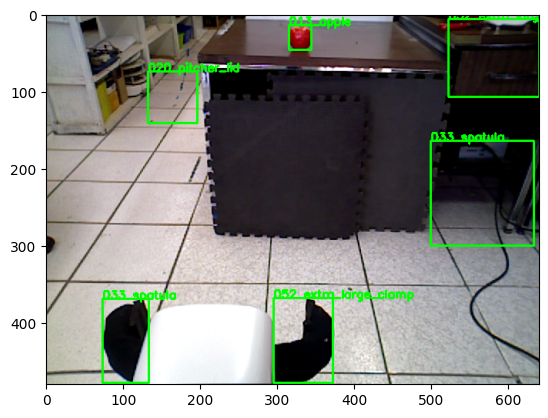

In [24]:

plt.imshow(debug_image)

In [25]:

for i in range(len(res.poses)):
    tf_man.getTF("head_rgbd_sensor_rgb_frame")
    tf_man.pub_static_tf(pos=[res.poses[i].position.x ,res.poses[i].position.y,res.poses[i].position.z], rot=[0,0,0,1],ref="head_rgbd_sensor_rgb_frame",point_name=res.names[i].data[4:] )   
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(res.names[i].data[4:])



In [26]:
omni_base.move_d_to(target_distance=0.78,target_link='apple')

header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
goal_id: 
  stamp: 
    secs: 0
    nsecs:         0
  id: ''
goal: 
  x: 9.202184553297315
  y: -2.374376233485807
  yaw: -3.1350657595400335
  timeout: 60
  known_location: "None"


[ERROR] [1707240304.440442]: Got a transition callback on a goal handle that we're not tracking


True

[ERROR] [1707240309.358611]: Got a result when we were already in the DONE state


In [27]:
target_object='apple'
trans,_=tf_man.getTF(target_object,ref_frame="base_link")
trans


[1.033007455374964, -0.05915995014943043, 0.6952291119245313]

In [28]:
target_object='apple'
_,rot= tf_man.getTF("base_link",ref_frame='map')

original_rot=tf.transformations.euler_from_quaternion(rot)[2]
trans,_=tf_man.getTF(target_object,ref_frame="base_link")


trans , original_rot

([1.0336749246778574, -0.06090206194773318, 0.6952291119245311],
 -3.0947471099553114)

In [29]:
_,rot= tf_man.getTF("base_link",ref_frame='map')
original_rot=tf.transformations.euler_from_quaternion(rot)[2]
target_object='apple'


succ = False
            
while not succ:
    
    _,rot= tf_man.getTF("base_link",ref_frame='map')
    trans,_=tf_man.getTF(target_object,ref_frame="base_link")

    trans
    eX, eY, eZ = trans
    
    eX+= -0.4
    eY+= -.06
    
    eT= tf.transformations.euler_from_quaternion(rot)[2] - original_rot #Original 
    print (eT)
    if eT > np.pi: eT=-2*np.pi+eT
    if eT < -np.pi: eT= 2*np.pi+eT
    rospy.loginfo("error: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(eX, eY , eT,target_object))
    X, Y, Z = trans
    rospy.loginfo("Pose: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(X, Y , eT,target_object))
    
    if abs(eX) <=0.05 :
        print ('here')
        eX = 0
    if abs(eY) <=0.05  :
        eY = 0
    if abs(eT   ) < 0.1:
        eT = 0
    succ =  eX == 0 and eY == 0 and eT==0

    
    omni_base.tiny_move( velX=0.2*+eX,velY=0.3*eY, velT=-eT,std_time=0.2, MAX_VEL=0.3) 


0.0
[INFO] [1707240322.483785]: error: 0.63, -0.12, angle 0.00, target obj frame apple
[INFO] [1707240322.489248]: Pose: 1.03, -0.06, angle 0.00, target obj frame apple
-0.020311093890773346
[INFO] [1707240322.693671]: error: 0.63, -0.10, angle -0.02, target obj frame apple
[INFO] [1707240322.697558]: Pose: 1.03, -0.04, angle -0.02, target obj frame apple
-0.021299623200615514
[INFO] [1707240322.903964]: error: 0.60, -0.09, angle -0.02, target obj frame apple
[INFO] [1707240322.908827]: Pose: 1.00, -0.03, angle -0.02, target obj frame apple
-0.02899942724518345
[INFO] [1707240323.113415]: error: 0.57, -0.08, angle -0.03, target obj frame apple
[INFO] [1707240323.117715]: Pose: 0.97, -0.02, angle -0.03, target obj frame apple
-0.034641418323511974
[INFO] [1707240323.323553]: error: 0.55, -0.07, angle -0.03, target obj frame apple
[INFO] [1707240323.328249]: Pose: 0.95, -0.01, angle -0.03, target obj frame apple
-0.03887305295523813
[INFO] [1707240323.534515]: error: 0.53, -0.06, angle -

6.212674190958792
[INFO] [1707240331.983176]: error: 0.09, -0.02, angle -0.07, target obj frame apple
[INFO] [1707240331.994207]: Pose: 0.49, 0.04, angle -0.07, target obj frame apple
6.21330314054978
[INFO] [1707240332.201428]: error: 0.08, -0.02, angle -0.07, target obj frame apple
[INFO] [1707240332.205840]: Pose: 0.48, 0.04, angle -0.07, target obj frame apple
6.212118249905414
[INFO] [1707240332.410990]: error: 0.08, -0.02, angle -0.07, target obj frame apple
[INFO] [1707240332.414544]: Pose: 0.48, 0.04, angle -0.07, target obj frame apple
6.212617741694187
[INFO] [1707240332.619091]: error: 0.08, -0.02, angle -0.07, target obj frame apple
[INFO] [1707240332.622733]: Pose: 0.48, 0.04, angle -0.07, target obj frame apple
6.214234679620457
[INFO] [1707240332.827328]: error: 0.07, -0.02, angle -0.07, target obj frame apple
[INFO] [1707240332.831268]: Pose: 0.47, 0.04, angle -0.07, target obj frame apple
6.214203163415383
[INFO] [1707240333.038767]: error: 0.07, -0.02, angle -0.07, ta

In [30]:
res.names

[data: "013_apple",
 data: "052_extra_large_clamp",
 data: "033_spatula",
 data: "052_extra_large_clamp",
 data: "020_pitcher_lid",
 data: "033_spatula"]

In [31]:
hand_cam= HAND_RGB()


In [32]:
#clear_octo_client()

pickup_pose=[0.65,-1.2,0.0,-1.9, 0.0, 0.0]
succ= arm.go(pickup_pose)
gripper.open()


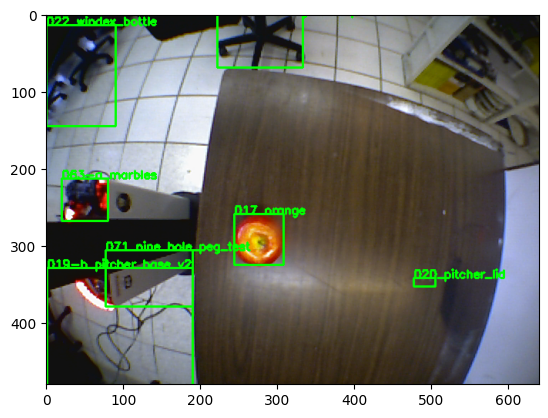

In [124]:

image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

plt.imshow(debug_image)

In [125]:
for i in range(len(res.names)):
    if res.names[i].data== '013_apple' or res.names[i].data== '017_orange':
        bbM=res.pt_min.data[2*i:2*i+2]
        bbm=res.pt_max.data[2*i:2*i+2]
        bbx=[bbM,bbm]
print(bbx)
eY=(bbx[0][0]-297)/297
print(f'error relative to gripper cam {eY}')

[(308, 325), (244, 259)]
error relative to gripper cam 0.037037037037037035


In [119]:
for i in range(len(res.names)):
    if res.names[i].data== '013_apple' or res.names[i].data== '017_orange':
        bbM=res.pt_min.data[2*i:2*i+2]
        bbm=res.pt_max.data[2*i:2*i+2]
        bbx=[bbM,bbm]
print(bbx)
eY=(bbx[0][0]-297)/297
print(f'error relative to gripper cam {eY}')

[(307, 386), (243, 319)]
error relative to gripper cam 0.03367003367003367


In [123]:
omni_base.tiny_move( velY=-eY, MAX_VEL=0.1) 

In [116]:

image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
for i in range(len(res.names)):
    if res.names[i].data== '013_apple' or res.names[i].data== '017_orange':
        print (i)
        
        bbM=res.pt_min.data[2*i:2*i+2]
        bbm=res.pt_max.data[2*i:2*i+2]

eY=(bbx[0][0]-297)/297
print(f'error relative to gripper cam {eY}')
omni_base.tiny_move( velY=-eY, MAX_VEL=0.1) 

2
3
error relative to gripper cam 0.04377104377104377


In [86]:
omni_base.tiny_move( velY=eY, MAX_VEL=0.1) 

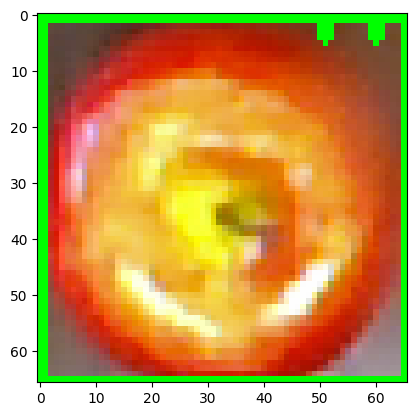

In [37]:
bbx
plt.imshow(debug_image[bbx[1][1]:bbx[0][1],bbx[1][0]:bbx[0][0]])

In [19]:
clear_octo_client()

av=arm.get_current_joint_values()
print (av,'av')
av[0]+= -0.17
succ=arm.go(av)
rospy.sleep(0.5)
gripper.close(force=0.06)

[0.6500863960807879, -1.1998775280188854, -8.534534369397662e-05, -1.8999086302849657, 8.010822381621097e-05, 0.0] av


In [20]:
av=arm.get_current_joint_values()
print (av,'av')
av[0]+= 0.15
succ=arm.go(av)
omni_base.tiny_move(velX=-0.3, std_time=4.0)
arm.set_named_target('go')
arm.go()
#tf_man.pub_static_tf(point_name='apple')

[0.48001718455913645, -1.1998775280188854, -3.934534369420817e-05, -1.8998116302849657, -0.0003068917761841483, 0.0] av


True